#### Setup
1. go to https://github.com/CSSEGISandData/COVID-19
2. git clone John Hopkins data repository into your Documents folder (only works for Windows, make necessary adjustments if you're on Mac)

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry_convert as pc
import os
import getpass
import subprocess
from datetime import datetime
user = getpass.getuser()
os.chdir("C:/Users/"+user+"/Documents/git/COVID-19")

top_no_countries = 10

In [2]:
# data pulling and date setting
output = subprocess.check_output(["git", "pull"])
cases_data  = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
last_day = cases_data.columns[-1]
week_ago = cases_data.columns[-8]
days_available = cases_data.columns[4:-1].tolist()
print(last_day)

4/2/20


In [3]:
# adding continent information to the data
missing_countries = {
    "Congo (Brazzaville)": "AF",
    "Congo (Kinshasa)": "AF",
    "Cote d'Ivoire": "AF",
    "Diamond Princess": "AS",
    "Holy See": "AS",
    "Korea, South": "AS",
    "Taiwan*": "AS",
    "Timor-Leste": "AS",
    "West Bank and Gaza": "AS",
    "Kosovo": "EU",
    "Burma": "AS",
    "MS Zaandam": "NA",
    "US": "NA"}

continent_names = {
    'EU': 'Europe',
    'NA': 'North America',
    'AS': 'Asia',
    'SA': 'South America',
    'AF': 'Africa',
    'OC': 'Australia and Oceania'
}

def country_to_continent(country):
    if country in missing_countries:
        return continent_names[missing_countries[country]]
    else:
        try:
            return continent_names[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        except:
            print(country)
            return "XX"

cases_data['continent']  = cases_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)
deaths_data['continent'] = deaths_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)

In [4]:
# continents - cases
continent_cases = cases_data[['continent', week_ago, last_day]]
continent_cases = continent_cases.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_cases['perc_increase'] = continent_cases.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_increase']], index = continent_cases.index)
continent_cases['perc_of_global'] = continent_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
continent_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_of_global']], index = continent_cases.index)
continent_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [5]:
# continents - deaths
continent_deaths = deaths_data[['continent', week_ago, last_day]]
continent_deaths = continent_deaths.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_deaths['perc_increase'] = continent_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_increase']], index = continent_deaths.index)
continent_deaths['perc_of_global'] = continent_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
continent_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_of_global']], index = continent_deaths.index)
continent_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

In [6]:
# countries - cases
countries_cases = cases_data[['Country/Region', week_ago, last_day]]
countries_cases = countries_cases.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_cases['perc_increase'] = countries_cases.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_increase']], index = countries_cases.index)
countries_cases['perc_of_global'] = countries_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
countries_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_of_global']], index = countries_cases.index)
countries_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [7]:
top_countries = list(countries_cases.head(top_no_countries).index)

In [8]:
# countries - deaths
countries_deaths = deaths_data[['Country/Region', week_ago, last_day]]
countries_deaths = countries_deaths.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_deaths['perc_increase'] = countries_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_increase']], index = countries_deaths.index)
countries_deaths['perc_of_global'] = countries_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
countries_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_of_global']], index = countries_deaths.index)
countries_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

C:\Users\m.puchala\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


                       3/26/20  4/2/20 perc_increase perc_of_global
continent                                                          
Europe                  283907  524109        84.61%         51.73%
North America            89948  260047       189.11%         25.67%
Asia                    141623  197004        39.10%         19.44%
South America             7688   19044       147.71%          1.88%
Africa                    3326    7032       111.43%          0.69%
Australia and Oceania     3099    5921        91.06%          0.58%


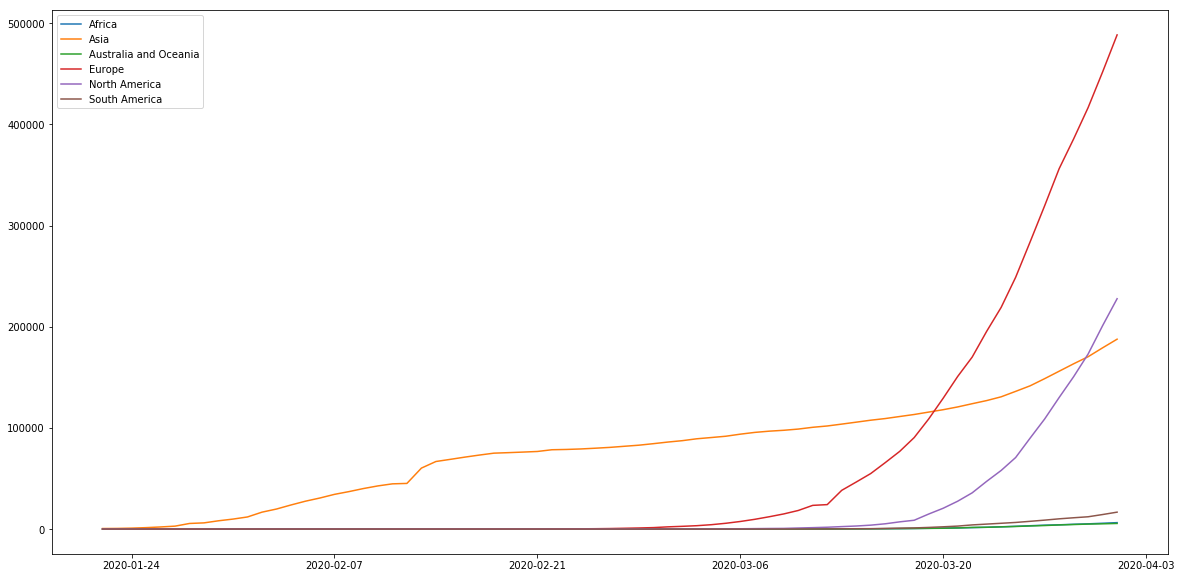

In [9]:
# continent cases - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_cases_graph = cases_data[['continent',] + days_available]
continent_cases_graph = pd.melt(continent_cases_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_cases_graph['day'] = continent_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_cases_graph.reset_index(inplace=True)
continent_cases_graph = pd.pivot_table(continent_cases_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_cases_graph.columns.levels[1]):
    plt.plot(continent_cases_graph.index, continent_cases_graph['cases'][continent])
plt.legend()
print(continent_cases)

                       3/26/20  4/2/20 perc_increase perc_of_global
continent                                                          
Europe                   16396   38111       132.44%         71.93%
Asia                      6048    7733        27.86%         14.60%
North America             1279    6231       387.18%         11.76%
South America              143     596       316.78%          1.12%
Africa                      91     287       215.38%          0.54%
Australia and Oceania       13      25        92.31%          0.05%


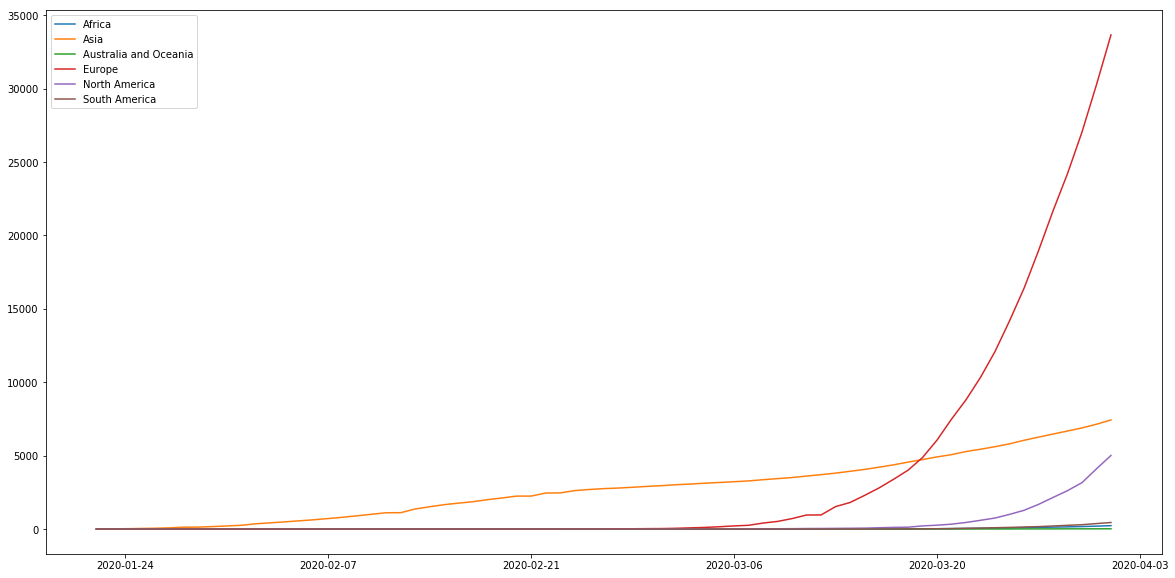

In [10]:
# continent deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_deaths_graph = deaths_data[['continent',] + days_available]
continent_deaths_graph = pd.melt(continent_deaths_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_deaths_graph['day'] = continent_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_deaths_graph.reset_index(inplace=True)
continent_deaths_graph = pd.pivot_table(continent_deaths_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_deaths_graph.columns.levels[1]):
    plt.plot(continent_deaths_graph.index, continent_deaths_graph['cases'][continent])
plt.legend()
print(continent_deaths)

                3/26/20  4/2/20 perc_increase perc_of_global
Country/Region                                              
US                83836  243453       190.39%         24.03%
Italy             80589  115242        43.00%         11.37%
Spain             57786  112065        93.93%         11.06%
Germany           43938   84794        92.99%          8.37%
China             81782   82432         0.79%          8.14%
France            29551   59929       102.80%          5.92%
Iran              29406   50468        71.62%          4.98%
United Kingdom    11812   34173       189.31%          3.37%
Switzerland       11811   18827        59.40%          1.86%
Turkey             3629   18135       399.72%          1.79%


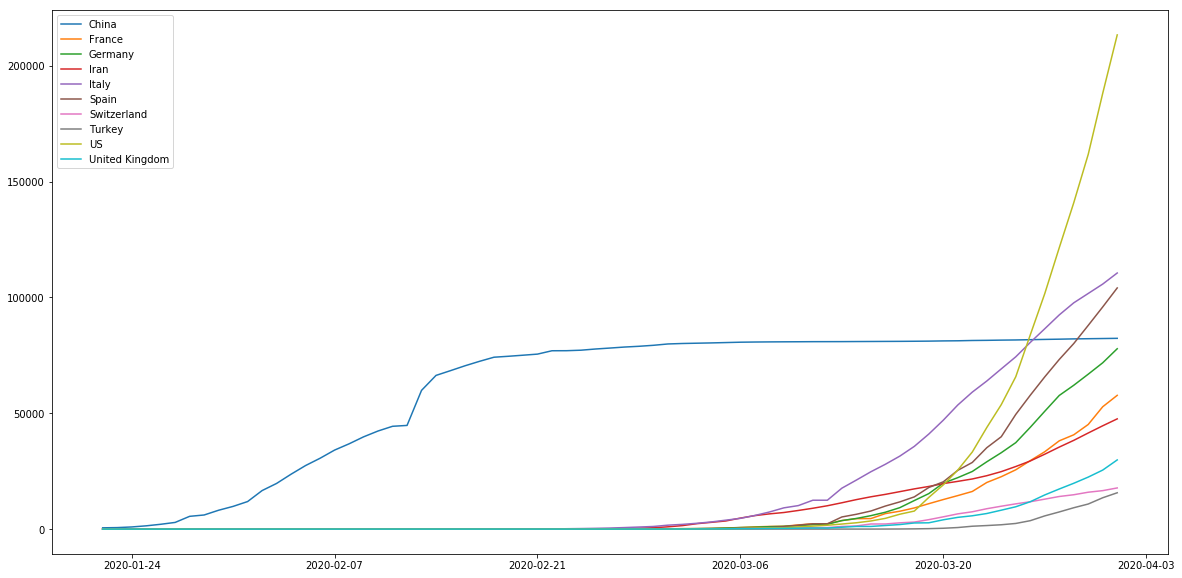

In [11]:
# country cases - graph
plt.rcParams["figure.figsize"] = (20,10)
country_cases_graph = cases_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_cases_graph = pd.melt(country_cases_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_cases_graph['day'] = country_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_cases_graph.reset_index(inplace=True)
country_cases_graph = pd.pivot_table(country_cases_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_cases_graph.columns.levels[1]):
    plt.plot(country_cases_graph.index, country_cases_graph['cases'][country])
plt.legend()
print(countries_cases.head(top_no_countries))

                3/26/20  4/2/20 perc_increase perc_of_global
Country/Region                                              
Italy              8215   13915        69.39%         26.26%
Spain              4365   10348       137.07%         19.53%
US                 1209    5926       390.16%         11.18%
France             1698    5398       217.90%         10.19%
China              3291    3322         0.94%          6.27%
Iran               2234    3160        41.45%          5.96%
United Kingdom      580    2926       404.48%          5.52%
Netherlands         435    1341       208.28%          2.53%
Germany             267    1107       314.61%          2.09%
Belgium             220    1011       359.55%          1.91%


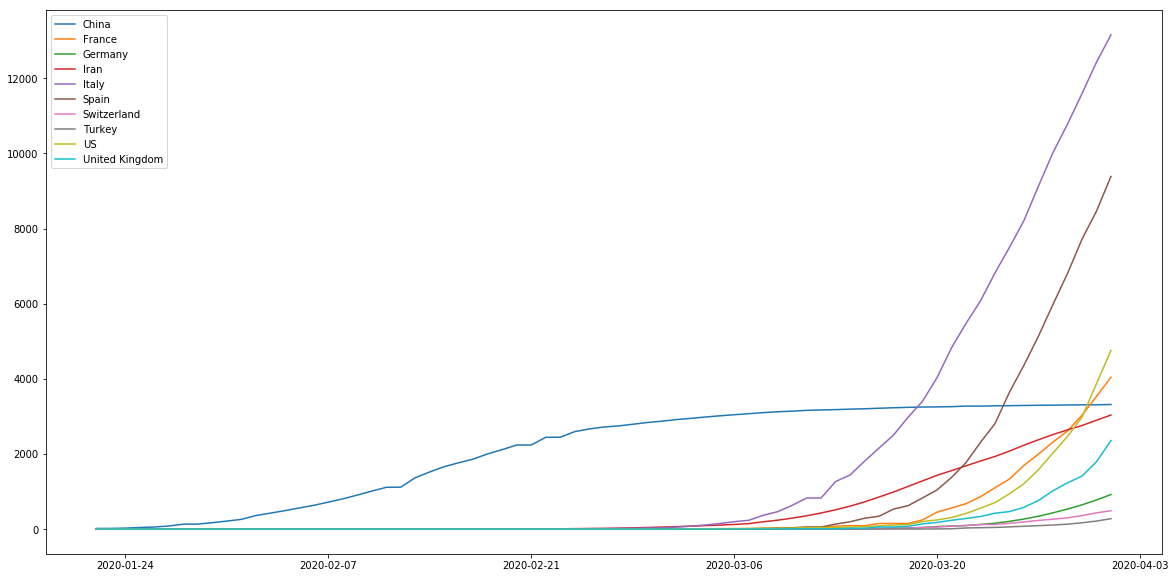

In [12]:
# country deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
country_deaths_graph = deaths_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_deaths_graph = pd.melt(country_deaths_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_deaths_graph['day'] = country_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_deaths_graph.reset_index(inplace=True)
country_deaths_graph = pd.pivot_table(country_deaths_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_deaths_graph.columns.levels[1]):
    plt.plot(country_deaths_graph.index, country_deaths_graph['cases'][country])
plt.legend()
print(countries_deaths.head(top_no_countries))